In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shinigami0811","key":"ef22b2b9022f0421c8b90bd64e5c0b4d"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 63.0MB/s]
  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 109MB/s]
100% 1.56G/1.56G [00:14<00:00, 26.2MB/s]
100% 1.56G/1.56G [00:14<00:00, 112MB/s] 
  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 581kB/s]


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [13]:
#As data size is huge we will be dealing with 2 million rows only

df_train =  pd.read_csv('/content/train.csv.zip', nrows = 2_000_000, parse_dates=["pickup_datetime"])
#/content/.kaggle/datasets/stackoverflow/stack-overflow-2018-developer-survey
# list first few rows (datapoints)
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02




*  Focussing on count here only 
*  As count is different for columns ,hence removing null values(only for now)
  

> **OTHER OPTIONS**


*   Only keeping rows which contain null values under column fare_amount as we might some information regarding fare_amount







In [15]:
df_train = df_train.dropna(how = 'any', axis = 'rows')
df_train.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06
mean,1.134768e+01,-7.252324e+01,3.992965e+01,-7.252395e+01,3.992808e+01,1.684125e+00
std,9.852609e+00,1.286798e+01,7.983330e+00,1.277497e+01,1.032382e+01,1.314979e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


**UNIVARIATE ANALYSIS**


**1)fare_amount**

*  It is an ordinal variable.
*  Removing negative values as fare cannot be negative
*  Removing values below 2.5 as minimum fare at NYC is $2.5 by checking google . http://nymag.com/nymetro/urban/features/taxi/n_20286/



In [16]:
df_train = df_train.drop(df_train[df_train['fare_amount']<2.5].index, axis=0)
df_train.shape

(1999831, 8)

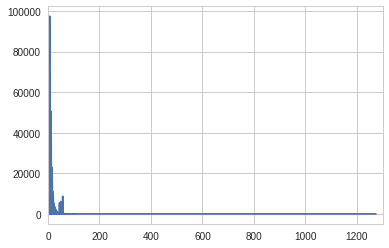

In [17]:
df_train['fare_amount'].value_counts().sort_index().plot.line(xlim=(0,1300))

In [18]:
df_train['fare_amount'].describe()

count    1.999831e+06
mean     1.134885e+01
std      9.851729e+00
min      2.500000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

785 67 8 8 1


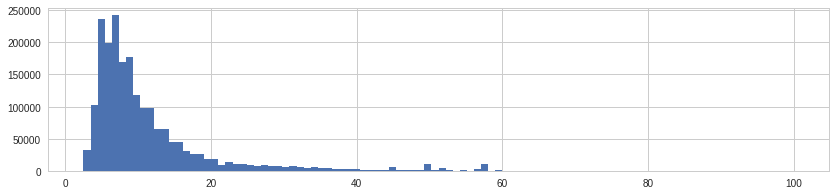

In [19]:
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
p1=len(df_train[df_train.fare_amount>100])
p2=len(df_train[df_train.fare_amount>200])
p3=len(df_train[df_train.fare_amount>400])
p4=len(df_train[df_train.fare_amount>400])
p5=len(df_train[df_train.fare_amount>1000])
print(p1,p2,p3,p4,p5)

By checking values on different intervals we can safely assume that maximum fare cannot be more that 500

In [20]:
df_train = df_train[(df_train.fare_amount>=2.5) & (df_train.fare_amount<=500) ]
df_train['fare_amount'].describe()

count    1.999830e+06
mean     1.134822e+01
std      9.811232e+00
min      2.500000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      5.000000e+02
Name: fare_amount, dtype: float64

**2)passenger_count**

In [21]:
df_train['passenger_count'].describe()

count    1.999830e+06
mean     1.684136e+00
std      1.314991e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

Clearly 208 is an outliear !,Considering a passenger_count can be between 1 and 7 both included(an SUV with capacity 7) ,removing every other value. 
#Can be done (Optional)
Currently we are removing 0 passenger _count entries  from a training set, later we can add them by applying linear regression to fare_amount values and estimate the number of passengers as we do not want to loose any information regarding fare_amount,so we will add number of passengers using fare_amount and then use this data in our final model.

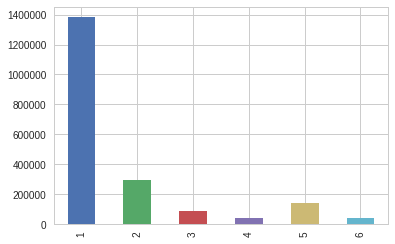

In [22]:
df_train = df_train[(df_train.passenger_count < 7) & (df_train.passenger_count>0 )]
df_train['passenger_count'].value_counts().sort_index().plot.bar()


**3)Geospatial Analysis**

Using haversine formula to calculate distance

In [0]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [df_train]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [24]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0           1.030764
1           8.450134
2           1.389525
3           2.799270
4           1.999157
5           3.787239
6           1.555807
7           4.155444
8           1.253232
9           2.849627
10          1.374577
11          0.000000
12          0.717767
13          2.019384
14          1.671445
15          0.000000
16          2.609774
17          1.511904
18          0.921952
19          0.399179
20          1.686861
21          2.292470
22          0.924296
23          1.403958
24          1.017773
25          2.531947
26          0.000000
27          0.328771
28          4.073463
29          0.808153
             ...    
1999969     2.602578
1999970     2.271763
1999971     2.387119
1999972     2.600129
1999973     0.741812
1999974     7.115489
1999975     3.983960
1999976     4.028850
1999977     0.000374
1999978     1.032864
1999979     0.454019
1999980     1.695192
1999981     0.509253
1999982     0.470226
1999983     3.093461
1999984     2.132163
1999985     9

**Preparing date columns **

In [0]:
data = [df_train]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [27]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


**BIVARIATE ANALYSIS**

 Number of passengers and the fare_count

Text(0,0.5,'Frequency')

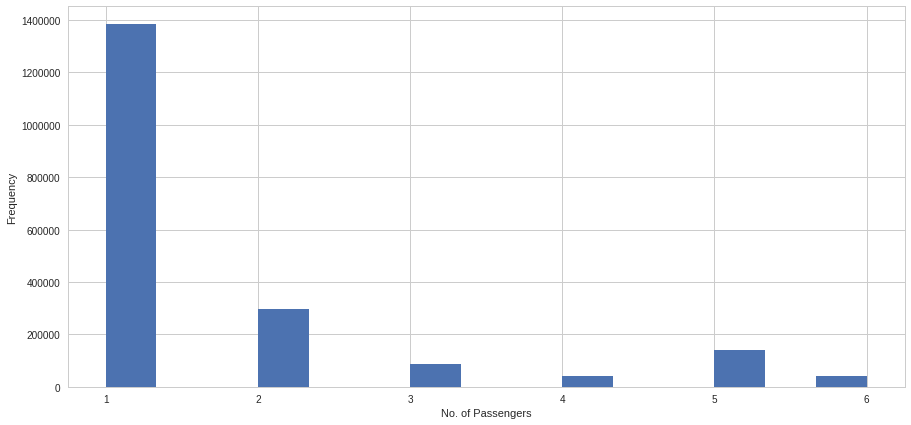

In [28]:
plt.figure(figsize=(15,7))
plt.hist(df_train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0,0.5,'Fare')

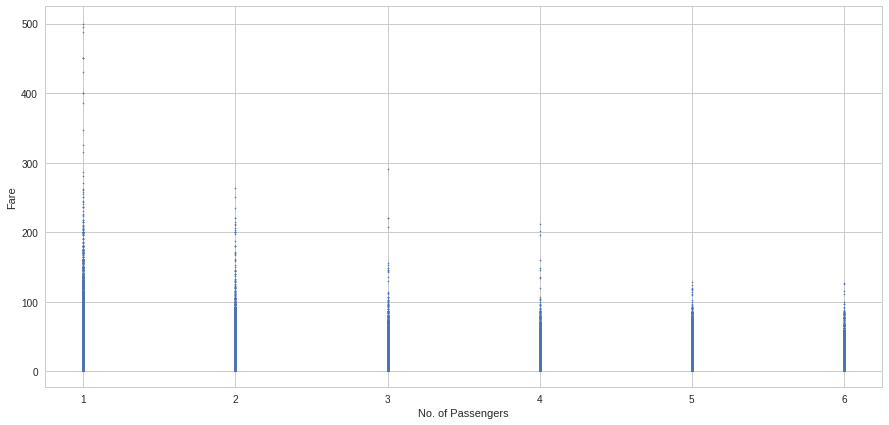

In [29]:
plt.figure(figsize=(15,7))
plt.scatter(x=df_train['passenger_count'], y=df_train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

We can learn from above data they are correlated ,as most of the fare comes from passenger_count == 1

 **Relationship between date pickup and fare**

Text(0,0.5,'Fare')

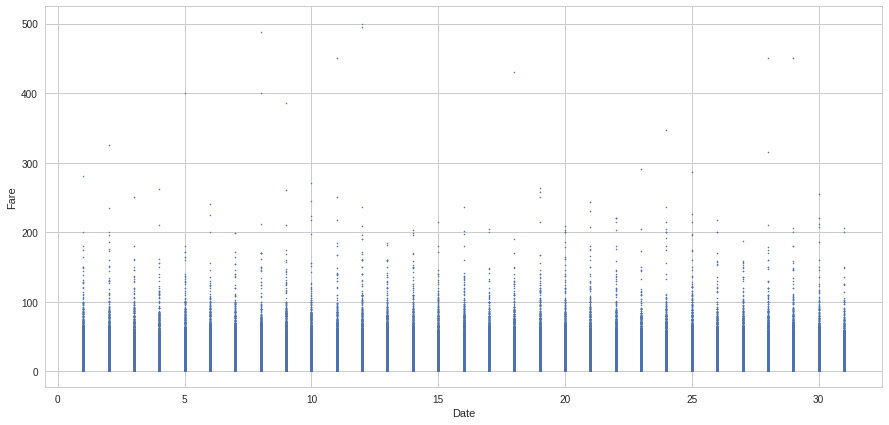

In [30]:
plt.figure(figsize=(15,7))
plt.scatter(df_train['Date'], y=df_train['fare_amount'], s=1.4)
plt.xlabel('Date')
plt.ylabel('Fare')

Not much can be concluded from this graph,it is mostly uniform

**Relationship between Day pickup and fare**

Text(0,0.5,'Frequency')

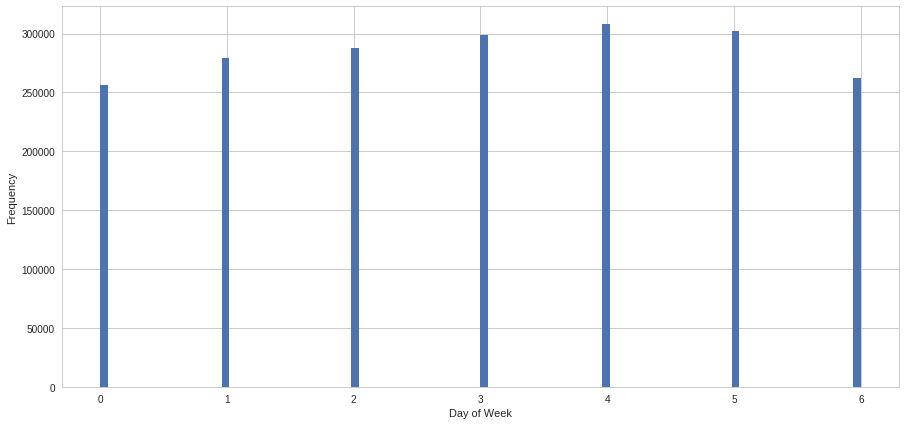

In [31]:
plt.figure(figsize=(15,7))
plt.hist(df_train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Not much can be concluded from this graph,as most people travel during weekend.

Text(0,0.5,'Fare')

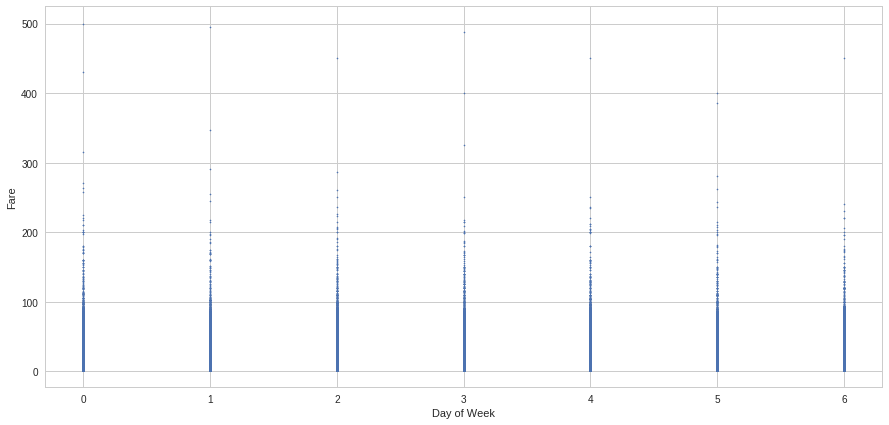

In [32]:
plt.figure(figsize=(15,7))
plt.scatter(x=df_train['Day of Week'], y=df_train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

Not much ,except the fact that as more people travel on weekend ,more fare frequency during those days

**Relationship between time of pickup and  fare**

Text(0,0.5,'Frequency')

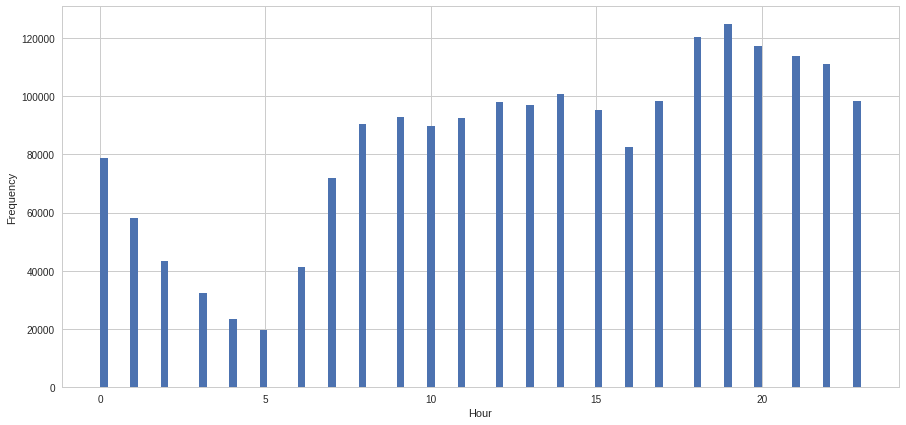

In [33]:
plt.figure(figsize=(15,7))
plt.hist(df_train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

We can conclude that  frequency of taxi_rides at 5am is low and around 8pm its high .This seems to be interesting.

Text(0,0.5,'Fare')

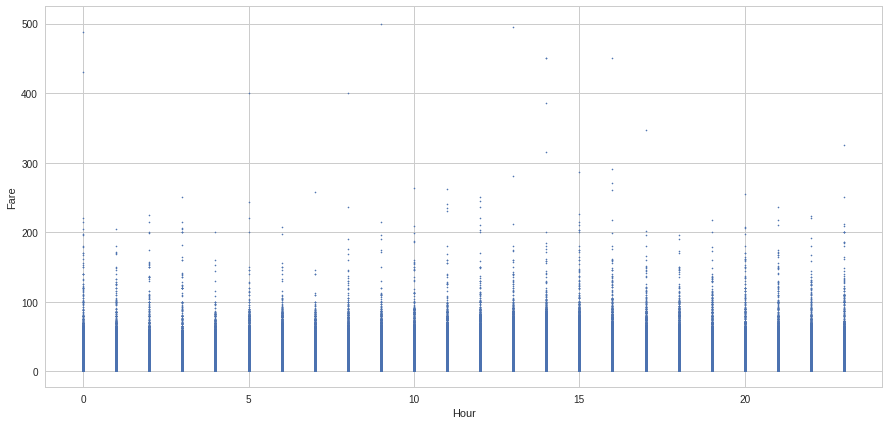

In [34]:
plt.figure(figsize=(15,7))
plt.scatter(x=df_train['Hour'], y=df_train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

Again ,not much can be concluded.

#### Does the distance affect the fare

Firstly, let's check the frequency of the distances that we calculated using Haversine formula.We will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [35]:
df_train.sort_values(['H_Distance','fare_amount'], ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
1388984,2012-01-18 21:33:00.00000068,11.30,2012-01-18 21:33:00,-1649.643088,-849.829532,2842.474030,3345.917353,1,17330.203211,2012,1,18,2,21
1258028,2012-01-16 12:53:00.000000205,6.50,2012-01-16 12:53:00,1721.172660,1283.652605,2469.149042,2193.823087,1,17074.508907,2012,1,16,0,12
748464,2013-01-02 11:33:00.00000020,15.00,2013-01-02 11:33:00,-74.015200,40.709665,-40.719295,1651.553433,5,16878.303157,2013,1,2,2,11
1632919,2010-08-10 18:19:45.0000001,7.30,2010-08-10 18:19:45,2814.475637,-66.919318,-2633.912142,3320.686797,1,16675.047322,2010,8,10,1,18
1237988,2011-12-30 09:10:00.00000087,49.80,2011-12-30 09:10:00,-3007.205450,284.006283,-844.140168,2950.087992,1,16244.891635,2011,12,30,4,9
1340837,2011-06-09 10:39:00.000000137,10.10,2011-06-09 10:39:00,2434.238557,-3458.664702,-1281.933787,-104.637653,1,14872.336973,2011,6,9,3,10
1726057,2012-03-01 22:40:00.000000237,8.10,2012-03-01 22:40:00,2856.441560,1320.026188,3414.306675,1248.743787,1,14394.614121,2012,3,1,3,22
793922,2012-06-03 11:19:37.0000002,32.10,2012-06-03 11:19:37,-73.863359,40.769278,45.581619,-2.013462,2,12594.704725,2012,6,3,6,11
436233,2012-03-11 01:56:00.000000100,4.10,2012-03-11 01:56:00,-2986.242495,-880.627428,-3383.296608,-2559.748913,1,12399.956433,2012,3,11,6,1
1935280,2012-09-18 17:13:00.000000153,9.50,2012-09-18 17:13:00,-73.979395,40.752990,-2125.745368,0.000000,1,11532.176571,2012,9,18,1,17


In [36]:
bins_0 = df_train.loc[(df_train['H_Distance'] == 0), ['H_Distance']]
bins_1 = df_train.loc[(df_train['H_Distance'] > 0) & (df_train['H_Distance'] <= 10),['H_Distance']]
bins_2 = df_train.loc[(df_train['H_Distance'] > 10) & (df_train['H_Distance'] <= 50),['H_Distance']]
bins_3 = df_train.loc[(df_train['H_Distance'] > 50) & (df_train['H_Distance'] <= 100),['H_Distance']]
bins_4 = df_train.loc[(df_train['H_Distance'] > 100) & (df_train['H_Distance'] <= 200),['H_Distance']]
bins_5 = df_train.loc[(df_train['H_Distance'] > 200) & (df_train['H_Distance'] <= 300),['H_Distance']]
bins_6 = df_train.loc[(df_train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

Text(0,0.5,'Frequency')

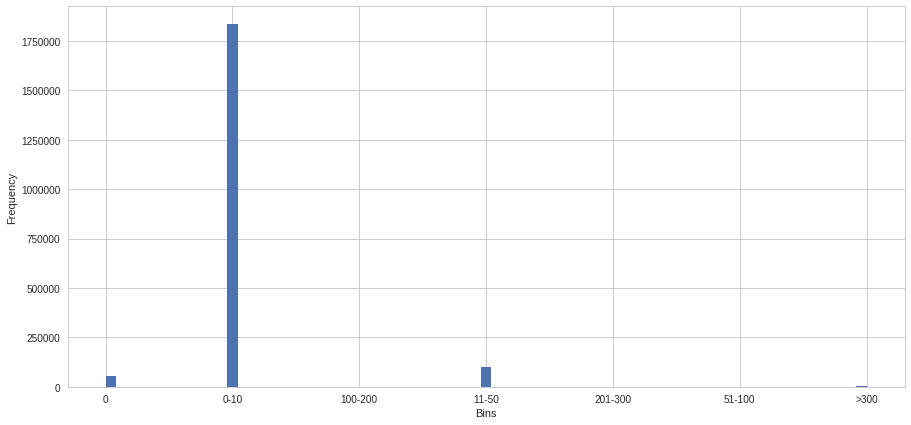

In [37]:
plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

By above we can safely remove following rows because if fare is zero they will not help us much in predicting the fare_amount :-


*   Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0 and vice versa

Also below case will also not help us much.

*  Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. 

#### TO BE INVESTIGATED
* High distance -around 300km are their, we need to investigate them ,can be due to error in calculating results.

* For now I am dropping them.  



In [0]:
df_train = df_train.drop(df_train.loc[((df_train['pickup_latitude']==0) & (df_train['pickup_longitude']==0))&((df_train['dropoff_latitude']!=0) & (df_train['dropoff_longitude']!=0)) & (df_train['fare_amount']==0)].index, axis=0)

In [0]:
high_distance = df_train.loc[(df_train['H_Distance']>300)&(df_train['fare_amount']!=0)]

Removing  rows having fare and distance both zero

In [41]:
df_train[(df_train['H_Distance']==0)&(df_train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


#### TO BE INVESTIGATED
* Fare is 0, but Distance is not 0. These values need to be imputed.
Using formula to calculate distance 
* Here we dropped them


scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [52]:
df_train.loc[(df_train['H_Distance']==0) & (df_train['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.00000098,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3,0.0,2012,12,24,0,11
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2013,11,23,5,12
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2011,2,7,0,20
105,2009-03-25 00:08:52.0000001,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1,0.0,2009,3,25,2,0
124,2013-01-17 17:22:00.00000043,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2,0.0,2013,1,17,3,17
191,2014-01-08 21:55:58.0000006,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1,0.0,2014,1,8,2,21
192,2010-09-05 17:08:00.00000092,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5,0.0,2010,9,5,6,17
233,2011-07-24 01:14:35.0000002,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2,0.0,2011,7,24,6,1
270,2012-08-25 01:53:42.0000005,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1,0.0,2012,8,25,5,1
273,2009-10-30 18:13:00.00000021,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4,0.0,2009,10,30,4,18


In [55]:
p = df_train.loc[(df_train['H_Distance']==0) & (df_train['fare_amount']!=0)]
len(p)



56682

Cannot drop them ,these contain good values for fare ,hence I will use the following formula
to calculate distance.

* distance = (fare_amount - 2.5)/1.56

In [0]:
p_sub = p.loc[(p['fare_amount']>=2.5)&(p['H_Distance']==0)]

In [66]:


p_sub['H_Distance']=(p_sub['fare_amount']-2.50)/1.56
p_sub["H_Distance"]

11          1.923077
15          1.602564
26          2.564103
105        31.730769
124         3.525641
191         2.564103
192         0.769231
233         3.846154
270         3.205128
273         3.589744
290         2.820513
357         3.846154
376         0.000000
387         6.730769
396         6.089744
498         9.294872
503         0.000000
540         8.653846
542         1.282051
568         2.564103
657         0.000000
660         6.923077
728         5.897436
737        35.147436
799         0.320513
808         2.307692
843         1.923077
872         3.846154
881         3.846154
887         6.089744
             ...    
1999076     0.641026
1999090     4.102564
1999104     2.051282
1999118    10.769231
1999159     1.025641
1999218     4.166667
1999299     0.961538
1999301     3.846154
1999318     0.961538
1999335     0.961538
1999344     3.205128
1999359     2.564103
1999382    34.807692
1999395     1.282051
1999422     7.435897
1999486     2.564103
1999489     5

In [65]:
df_train.update(p_sub)
df_train.shape

(1992719, 14)